In [1]:
import numpy as np
import pandas as pd
from deepneuralnet import *
import deepneuralnet_train as dnntrain

In [7]:
# Set up hyper parameters 
classes = 2
layer_dims = [10, classes] 
learning_rate = 0.001
keep_prob = 0.8
num_epochs = 200
minibatch_size = 64
momentum = 0.97
maxnorm_clip = 3
print_summary = False
isBinary = classes == 2 
hyperparams = DNN.create_hyperparameter_bundle(layer_dims, learning_rate, num_epochs, keep_prob, minibatch_size, momentum, maxnorm_clip)
print(hyperparams)

{'layer_dims': [10, 2], 'keep_prob': 0.8, 'learning_rate': 0.001, 'num_epochs': 200, 'minibatch_size': 64, 'momentum': 0.97, 'maxnorm_clip': 3}


In [8]:
# Generate data
m = 1000
n_x = 100
label = 'Survived'
x_data = np.random.rand(m, n_x).astype('float32')
y_test = None

if isBinary:
    y_test = np.random.randint(2, size=(1, m)).astype('float32')[0]
else:
    y_test = np.random.randint(classes, size=(1, m)).astype('float32')[0]

df = pd.DataFrame(x_data)
df[label] = y_test
classification = len(set(y_test))
print(classification)

2


train_x.shape: (700, 100)
train_y.shape: (700, 2)
dev_x.shape: (300, 100)
dev_y.shape: (300, 2)
Binary classification neural network with hyperparameters:
layer_dims: [10, 2] dropoutKeepProb: 0.8 learning_rate: 0.001 num_epochs: 200
minibatch_size: 64 momentum: 0.97 maxnormclip: 3
Training underway...
Cost after epoch 0: 0.811880
Cost after epoch 20: 0.746106
Cost after epoch 40: 0.713878
Cost after epoch 60: 0.679009
Cost after epoch 80: 0.634493
Cost after epoch 100: 0.594231
Cost after epoch 120: 0.577662
Cost after epoch 140: 0.558868
Cost after epoch 160: 0.549298
Cost after epoch 180: 0.545639
Done Training!
Saving model at ./saved_model_1/dnn


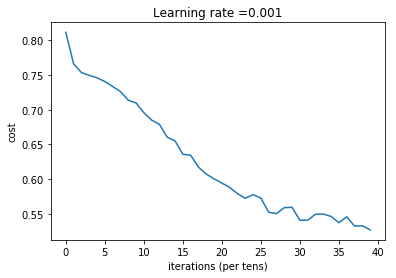

train_accuracy_percent : 85.0000023842
test_accuracy_percent : 49.6666669846
precision_percent : 49.6666666667
recall_percent : 49.6666666667
f1score : 49.6666666667



In [9]:
# Example of using dnn.train_with_hyperparameter_bundle
nn = DNN(hyperparams)
model = nn.split_data_and_train(df, label, split_percent=0.7)
parameters = model[DNN.KEY_PARAMETERS]

In [10]:
predictions = nn.predict(x_data, parameters)
print(predictions.shape)

(1000,)
